In [1]:
# Import necessary packages
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Install pytrends which gives access to Google Trends API

In [3]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Setting up the pytrend packages to get access to Google Trends API
from pytrends.request import TrendReq
pytrend = TrendReq(hl='cs', tz=360)

In [5]:
os.getcwd()

'/Users/aghauss/Desktop/Python Project'

In [6]:
#Import of the keyword data
colnames = ["keywords"]
df = pd.read_csv("keyword_list.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")
dataset = []

In [7]:
print(df2)

['Pizza', 'Delivery', 'Burger', 'Wolt', 'Bolt', 'Indian']


In [8]:
#Requesting data from Google Trends
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-01 2020-12-31',
     geo='CZ')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

In [9]:
#Saving the results
result_2020_cz = pd.concat(dataset, axis=1)
result_2020_cz.to_csv('search_trends.csv')

In [10]:
result_2020_cz.head()

,Pizza,Delivery,Burger,Wolt,Bolt,Indian
date,,,,,,
2020-01-05,75,56,68,18,82,58
2020-01-12,75,33,74,38,97,69
2020-01-19,84,35,63,27,51,64
2020-01-26,76,30,74,39,66,74
2020-02-02,78,64,80,30,69,54


<AxesSubplot:xlabel='date'>

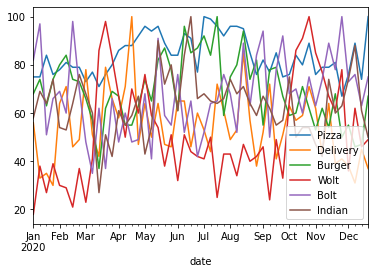

In [11]:
result_2020_cz.plot()

In [13]:
overall_pearson_r = result_2020_cz.corr().iloc[0,5]
print(f"Pearson r: {overall_pearson_r}")

Pearson r: 0.25130368292537403


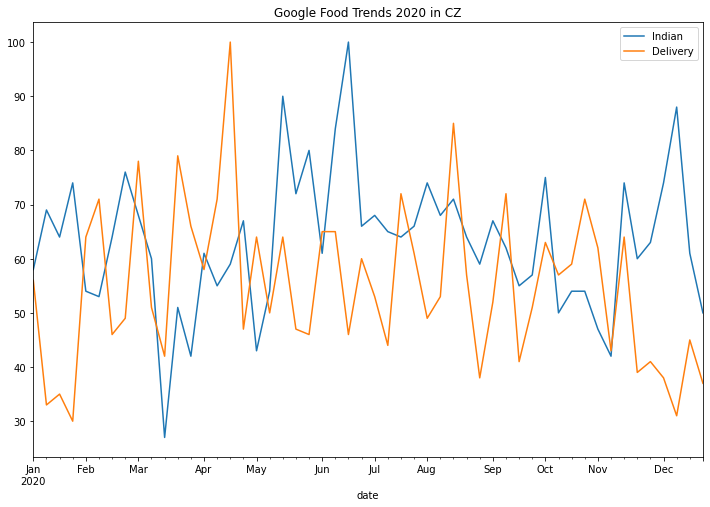

In [14]:
dx = result_2020_cz.plot(figsize = (12,8), y=["Indian","Delivery"], kind="line", title = "Google Food Trends 2020 in CZ")

In [188]:
dataset2 = []

In [189]:
from pytrends.request import TrendReq
pytrend = TrendReq(hl='de', tz=360)

#Requesting data from Google Trends
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-01 2020-12-31',
     geo='DE')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset2.append(data)

In [190]:
#Saving the results
result_2020_ger = pd.concat(dataset, axis=1)
result_2020_ger.to_csv('search_trends2.csv')

In [191]:
result_2020_ger.head()

,Pizza,Delivery,Burger,Wolt,Bolt,Indian
date,,,,,,
2020-01-05,75,56,68,18,82,58
2020-01-12,75,33,74,38,97,69
2020-01-19,84,35,63,27,51,64
2020-01-26,76,30,74,39,66,74
2020-02-02,78,64,80,30,69,54


In [193]:
risk_data = pd.read_csv("Risk Data.csv") 

In [195]:
risk_data.head()

,datum,index rizika
0,01.10.2020,52
1,02.10.2020,52
2,03.10.2020,52
3,04.10.2020,52
4,05.10.2020,57


In [209]:
df_risk = pd.DataFrame(risk_data,columns = ['datum','index rizika'])

In [211]:
df_risk.head()

,datum,index rizika
0,01.10.2020,52
1,02.10.2020,52
2,03.10.2020,52
3,04.10.2020,52
4,05.10.2020,57


<AxesSubplot:xlabel='datum'>

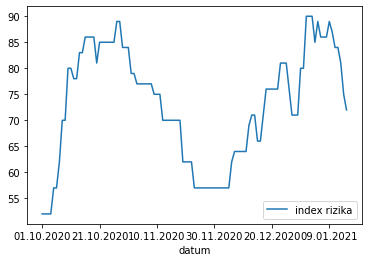

In [214]:
#Set date as index
df_risk = df_risk.set_index("datum")

#Then you can plot easily
df_risk.plot()